In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy

In [2]:
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_pickle('auctiondatacleanedtitle.pkl')

In [4]:
df.head()

,itemId,title,globalId,primaryCategory.categoryId,primaryCategory.categoryName,viewItemURL,paymentMethod,autoPay,location,country,...,read in desc,256gb in desc,red in desc,screen in desc,for in desc,faulty apple in desc,fault in desc,below in desc,new in desc,spares in desc
0,274325644985,Apple iPhone 7 Plus - 128GB - Jet Black (Unlocked) A1784 (GSM),EBAY-GB,9355,Mobile & Smart Phones,https://www.ebay.co.uk/itm/Apple-iPhone-7-Plus-128GB-Jet-Black-Unlocked-A1784-GSM-/274325644985,PayPal,False,"Corby,United Kingdom",GB,...,0,0,0,0,0,0,0,0,0,0
1,193490354217,Apple iPhone 7 Black 32GB (Unlocked) Please Read Description! Slight Fault!,EBAY-GB,9355,Mobile & Smart Phones,https://www.ebay.co.uk/itm/Apple-iPhone-7-Black-32GB-Unlocked-Please-Read-Description-Slight-Fault-/193490354217,PayPal,False,"Cannock,United Kingdom",GB,...,0,0,0,0,1,0,1,0,0,0
2,383676133123,Apple iPhone 7 Plus -128GB - Jet Black,EBAY-GB,9355,Mobile & Smart Phones,https://www.ebay.co.uk/itm/Apple-iPhone-7-Plus-128GB-Jet-Black-/383676133123,PayPal,False,Slovenia,SI,...,0,0,0,0,0,0,0,0,0,0
3,193490633324,Apple iPhone 7 - 32GB - Black (Unlocked) A1778 (GSM) Apple Warranty,EBAY-GB,9355,Mobile & Smart Phones,https://www.ebay.co.uk/itm/Apple-iPhone-7-32GB-Black-Unlocked-A1778-GSM-Apple-Warranty-/193490633324,PayPal,False,"Burnley,United Kingdom",GB,...,0,0,0,0,1,0,0,0,1,0
4,313184327229,Apple iPhone 7 Plus A1784 32GB-Unlocked-Excellent condition - 97% batt. health,EBAY-GB,9355,Mobile & Smart Phones,https://www.ebay.co.uk/itm/Apple-iPhone-7-Plus-A1784-32GB-Unlocked-Excellent-condition-97-batt-health-/313184327229,PayPal,False,"Epping,United Kingdom",GB,...,0,0,0,1,1,0,0,0,1,0


In [6]:
df['Day Started'] = df['listingInfo.startTime'].apply(lambda x: x.strftime('%A'))
df['Day Ended'] = df['listingInfo.endTime'].apply(lambda x: x.strftime('%A'))

In [7]:
df['Time Started'] = df['listingInfo.startTime'].apply(lambda x: x.hour)
df['Time Ended'] = df['listingInfo.endTime'].apply(lambda x: x.hour)

In [8]:
## 0.75 Pounds = 1 Dollar
exchange_rate = 0.753116
df['Start Price'] = df['ListingDetails.ConvertedStartPrice.value'].apply(lambda x: float(x)*exchange_rate)

In [9]:
other_countries = []
df['City'] = df['country']
df['Country'] = df['country']
for y,x in enumerate(df['location']):
    if(len(x.split(",")) == 1):
        country = x
        city = 'NotUK'
    elif(x.split(",")[1] == ' South'):
        country = 'South Korea'
        city = 'NotUK'
    else:
        city = x.split(",")[0]
        country = x.split(",")[1]
    df['City'].iloc[y] = city
    df['Country'].iloc[y] = country

C:\Users\Alex\Miniconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
cols_to_keep = ['globalId',
    'viewItemURL',
    'primaryCategory.categoryName',
    'paymentMethod',
    'autoPay',
    'sellerInfo.feedbackScore',
    'sellerInfo.positiveFeedbackPercent',
    'sellerInfo.feedbackRatingStar',
    'sellerInfo.topRatedSeller',
    'shippingInfo.shippingServiceCost.value',
    'shippingInfo.shippingType',
    'sellingStatus.currentPrice._currencyId',
    'sellingStatus.convertedCurrentPrice.value',
    'listingInfo.bestOfferEnabled',
    'listingInfo.buyItNowAvailable',
    'listingInfo.listingType',
    'listingInfo.watchCount',
    'condition.conditionId',
    'condition.conditionDisplayName',
    'isMultiVariationListing',
    'topRatedListing',
    'ListingDetails.CheckoutEnabled',
    'ListingDetails.HasReservePrice',
    'ListingDetails.HasUnansweredQuestions',
    'ListingDetails.HasPublicMessages',
    'PictureDetails.GalleryType',
    'PictureDetails.PhotoDisplay',
    'PictureDetails.PictureSource',
    'Brand',
    'Model',
    'Operating System',
    'Style',
    'Connectivity',
    'Features',
    'Processor',
    'Screen Size',
    'Storage Capacity',
    'Network',
    'Colour',
    'Model Number',
    'Day Started',
    'Day Ended',
    'Time Started',
    'Time Ended',
    'Buy It Now Price',
    'Start Price',
    'City',
    'Country',
    'unlocked  in title',
    '32gb  in title',
    'a1778  in title',
    '128gb  in title',
    'plus  in title',
    'a1784  in title',
    'condition  in title',
    'plus 128gb  in title',
    'faulty  in title',
    'read  in title',
    '256gb  in title',
    'red  in title',
    'screen  in title',
    'for  in title',
    'faulty apple  in title',
    'fault  in title',
    'below  in title',
    'new  in title',
    'spares  in title',
    'unlocked in desc',
    '32gb in desc',
    'a1778 in desc',
    '128gb in desc',
    'plus in desc',
    'a1784 in desc',
    'condition in desc',
    'plus 128gb in desc',
    'faulty in desc',
    'read in desc',
    '256gb in desc',
    'red in desc',
    'screen in desc',
    'for in desc',
    'faulty apple in desc',
    'fault in desc',
    'below in desc',
    'new in desc',
    'spares in desc']

df = df.drop(columns=[col for col in df if col not in cols_to_keep])
df = df.rename(columns={'sellingStatus.convertedCurrentPrice.value':'Price'})

In [11]:
fixed_price = df.loc[df['listingInfo.listingType'] == 'FixedPrice','listingInfo.listingType'].index
for i in fixed_price:
    price = df.iloc[i]['Price']
    df['Start Price'].iloc[i] = 0

In [12]:
df['Price'].describe()

count    18194.000000
mean     126.179550  
std      68.853568   
min      0.010000    
25%      87.000000   
50%      122.000000  
75%      160.000000  
max      5050.000000 
Name: Price, dtype: float64

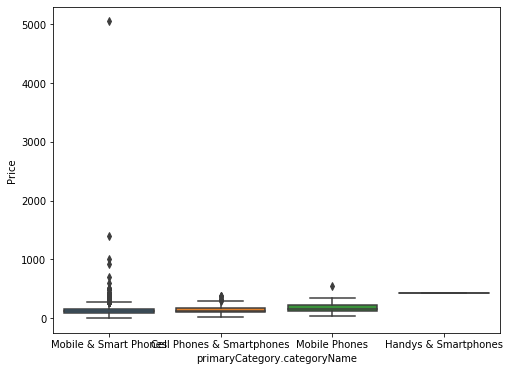

In [13]:
var = 'primaryCategory.categoryName'
data = pd.concat([df['Price'],df[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='Price',data=data)

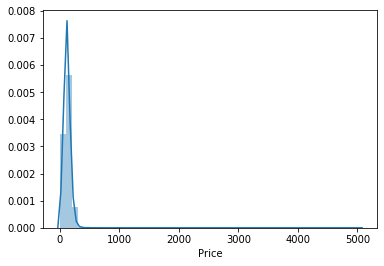

In [14]:
sns.distplot(df['Price'],norm_hist=True)

In [15]:
skew = df['Price'].skew()
kurt = df['Price'].kurt()
print(f'Skewness: : {skew}')
print(f'Kurtosis: : {kurt}')

Skewness: : 21.045840617649223
Kurtosis: : 1446.232784725795


((array([-3.95606735, -3.73873661, -3.61976428, ...,  3.61976428,
          3.73873661,  3.95606735]),
  array([1.00e-02, 9.90e-01, 9.90e-01, ..., 9.99e+02, 1.40e+03, 5.05e+03])),
 (57.746265423478, 126.17955040123121, 0.8385307320460023))

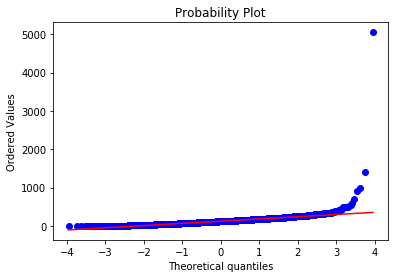

In [16]:
fig = plt.figure()
scipy.stats.probplot(df['Price'],plot=plt)

As you can see there is 1 or more results that is skewing the distribution to the right, which is a problem as we want the data to be normally distributed. There are clear outliers, so I am going to remove any values that are above £300. Also some values are very low e.g. 0.99p I'm assuming values less than £10 arn't authentic values and something else is going on i.e. ending an auction early to sell to a specific person.

In [17]:
outliers  = df.loc[df['Price'] > 300].index
df = df.drop(index=outliers)
price_less_than_ten_index = df[df['Price'] < 10].index
df = df.drop(index=price_less_than_ten_index)

In [23]:
original_df = df.reset_index(drop=True)

In [29]:
original_df.loc[original_df['Price'] > 250,'Price'].index

Int64Index([    0,    30,    73,    84,   349,   357,   359,   415,   491,
              494,
            ...
            17765, 17779, 17780, 17781, 17839, 17855, 17871, 17882, 17892,
            17955],
           dtype='int64', length=309)

In [37]:
original_df.iloc[494]

globalId                        EBAY-GB                                                                                                          
primaryCategory.categoryName    Mobile & Smart Phones                                                                                            
viewItemURL                     https://www.ebay.co.uk/itm/New-Apple-iPhone-7-128GB-Black-Factory-Unlocked-Smartphone-UK-TOP-Seller-/174218674261
paymentMethod                   PayPal                                                                                                           
autoPay                         True                                                                                                             
                                ...                                                                                                              
Time Started                    7                                                                                           

In [22]:
df.iloc[76]['Price']

135.0

The Correlations

In [20]:
df_1 = df.copy()
done_cols  = df.corr()['Price'].sort_values(ascending=False).index
not_done_cols = [col for col in df if col not in done_cols]
for col in not_done_cols:
    df_1[col] = pd.factorize(df[col])[0]

The top 10 positive correlations

(11.0, 0.0)

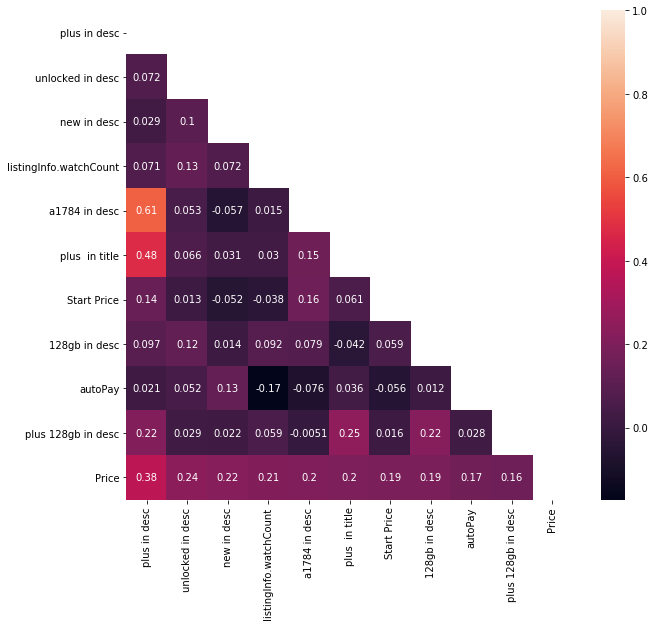

In [21]:
top_ten_cols = list(df.corr()['Price'].sort_values(ascending=False)[1:11].index)
top_ten_cols.append('Price')
df_top_ten = pd.DataFrame(columns=top_ten_cols)
df_top_ten = df[top_ten_cols]
corr_top_ten = df_top_ten.corr()
matrix = np.triu(df_top_ten.corr())
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(df_top_ten.corr(),annot=True,mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The bottom 10 positive correlations

(11.0, 0.0)

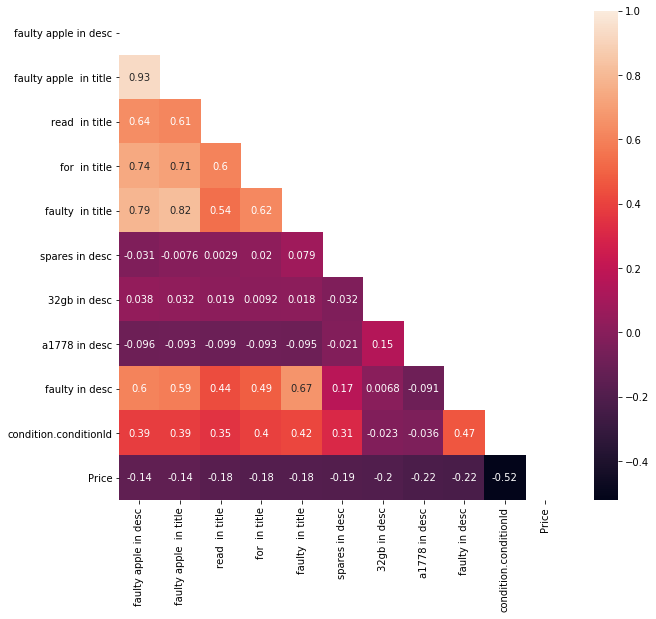

In [22]:
bottom_ten_cols = list(df.corr()['Price'].sort_values(ascending=False)[-10:].index)
bottom_ten_cols.append('Price')
df_bottom_ten = pd.DataFrame(columns=bottom_ten_cols)
df_bottom_ten = df[bottom_ten_cols]
corr_bottom_ten = df_bottom_ten.corr()
matrix = np.triu(df_bottom_ten.corr())
f,ax = plt.subplots(figsize=(10,9))
sns.heatmap(df_bottom_ten.corr(),annot=True,mask=matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

EDA

In [28]:
def plot_boxplot(df,var):
    data = pd.concat([df['Price'],df[var]],axis=1)
    f, ax = plt.subplots(figsize=(8,6))
    fig = sns.boxplot(x=var,y='Price',data=data)
def plot_corr(df,var,annot=True):
    con_df = pd.get_dummies(df[var])
    con_df = pd.concat([con_df,df['Price']],axis=1)
    corr = con_df.corr()
    matrix = np.triu(corr)
    f,ax = plt.subplots(figsize=(10,9))
    sns.heatmap(corr,annot=annot,mask=matrix)
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    

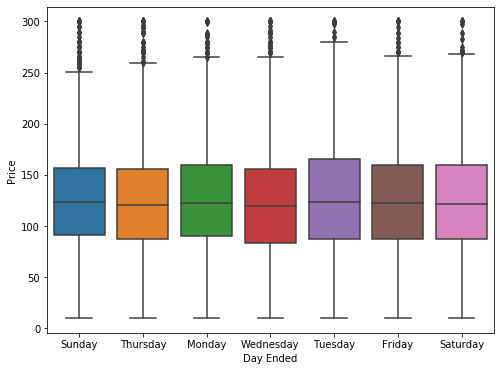

In [29]:
var = 'Day Ended'
plot_boxplot(df,var)

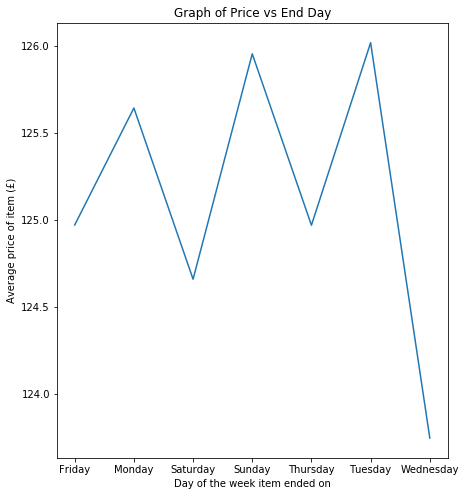

In [30]:
y = list(df[['Day Ended','Price']].groupby('Day Ended').mean().Price.values)
x = list(df[['Day Ended','Price']].groupby('Day Ended').mean().index)
f, ax = plt.subplots(figsize=(7,8))
plt.title("Graph of Price vs End Day")
plt.xlabel("Day of the week item ended on")
plt.ylabel("Average price of item (£)")
plt.plot(x,y)

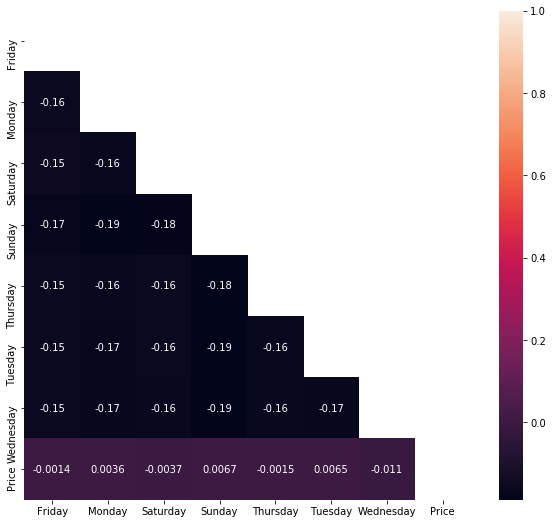

In [31]:
var = 'Day Ended'
plot_corr(df, var)

No real difference between the days that the listing ends on and the average price of the item.

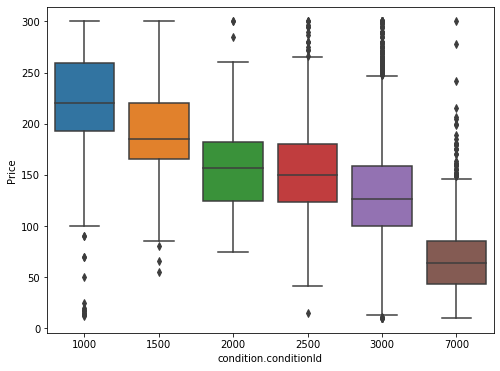

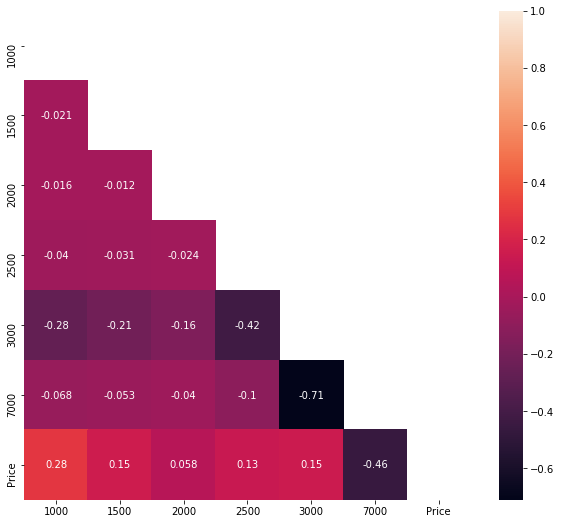

In [32]:
var = 'condition.conditionId'
plot_boxplot(df,var)
plot_corr(df,var)

Clear difference between the price of an item and its conditon ID, which makes sense.

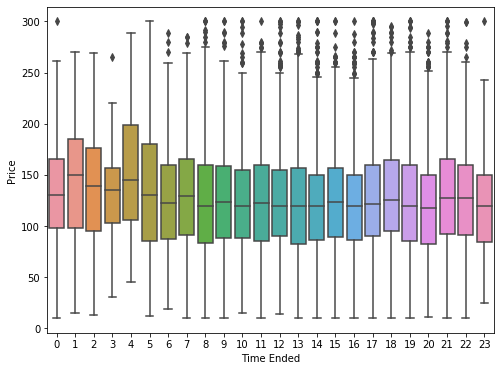

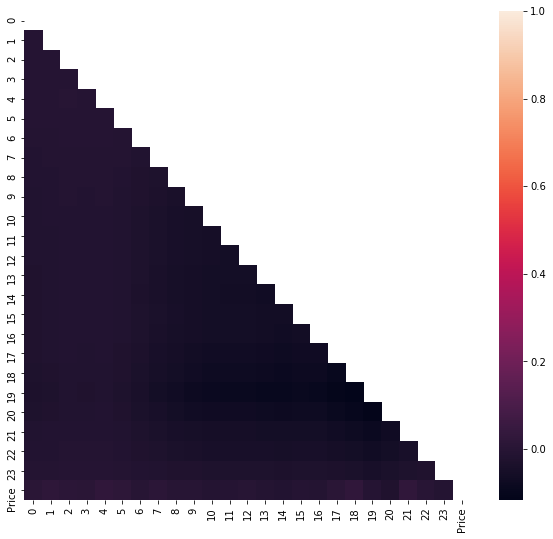

In [33]:
##Time started and Time Ended
var = 'Time Ended'
plot_boxplot(df,var)
plot_corr(df,var,annot=False)

Dosn't seem to be any correlation but I'm going to try and group together the times to see if that makes a difference

In [34]:
def fix_time(x):
    if(x >= 0 and x <= 5):
        x = 'Early Morning (1-6)'
        return x
    elif(x > 5 and x <= 10):
        x = 'Morning (7-12)'
        return x
    if(x > 12 and x <= 18):
        x = 'Afternoon (13-18)'
        return x
    else:
        x = 'Evening (19-24)'
        return x  

In [35]:
df['Time Started'] = df['Time Started'].apply(fix_time)
df['Time Ended'] = df['Time Ended'].apply(fix_time)

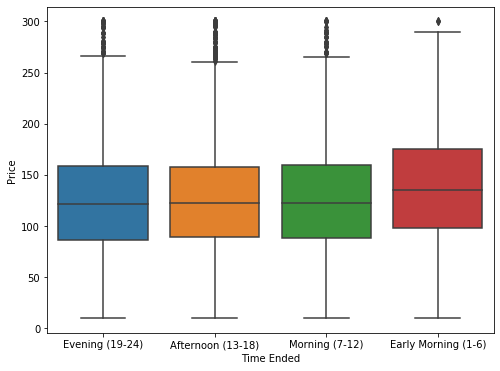

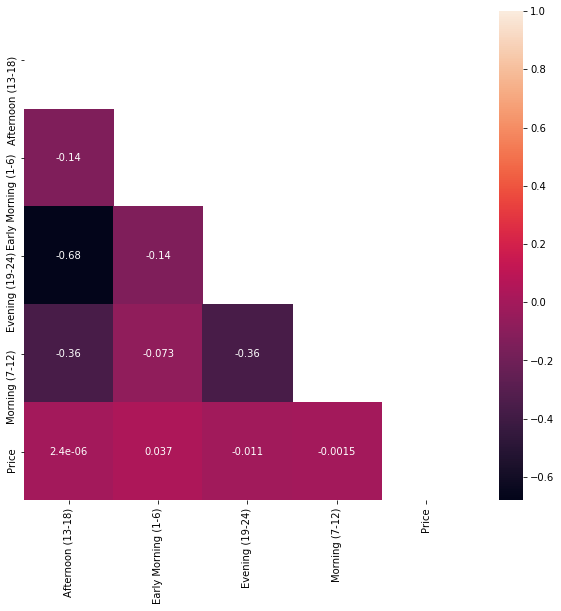

In [36]:
var = 'Time Ended'
plot_boxplot(df,var)
plot_corr(df,var)

Again still no real correlation between time ended and price.

In [37]:
##Globalid
df['globalId'].value_counts()

EBAY-GB      17742
EBAY-ENCA    85   
EBAY-AU      75   
EBAY-IE      50   
EBAY-US      41   
Name: globalId, dtype: int64

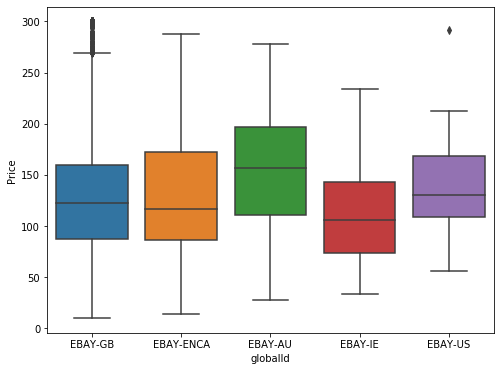

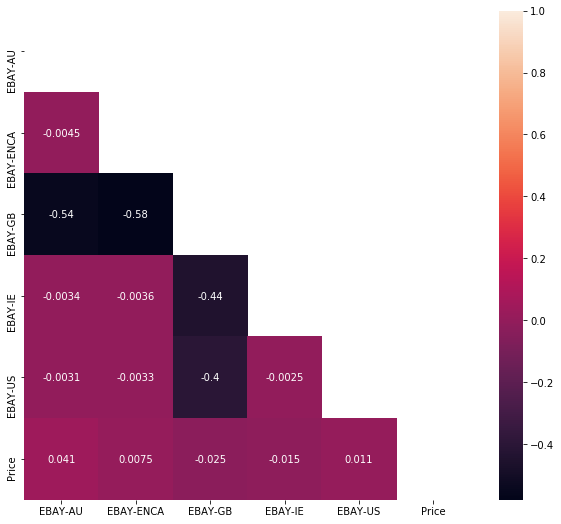

In [38]:
var = 'globalId'
plot_boxplot(df,var)
plot_corr(df,var)

In [39]:
df.loc[df['globalId'] != "EBAY-GB",'globalId'] = "Other Site"

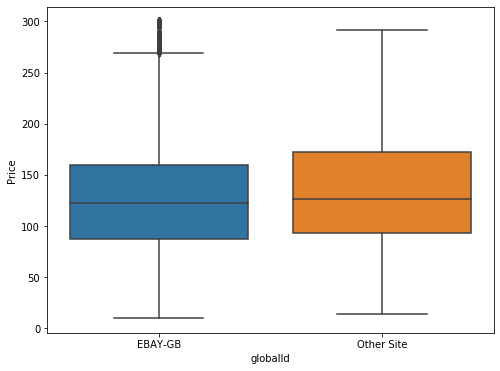

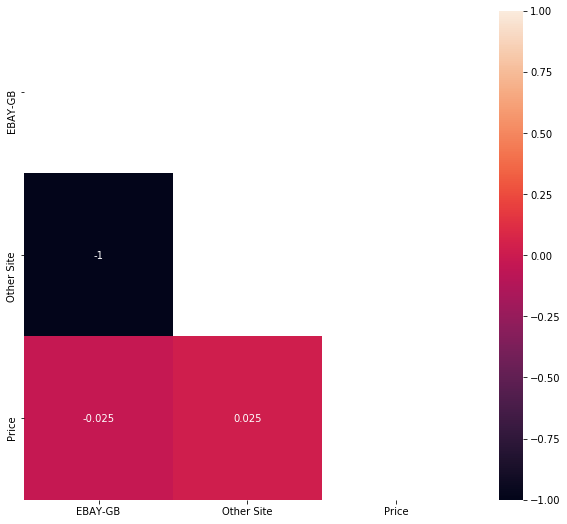

In [40]:
var = 'globalId'
plot_boxplot(df,var)
plot_corr(df,var)

Again hardly any difference.

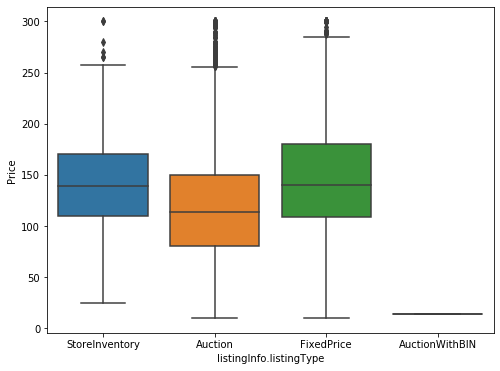

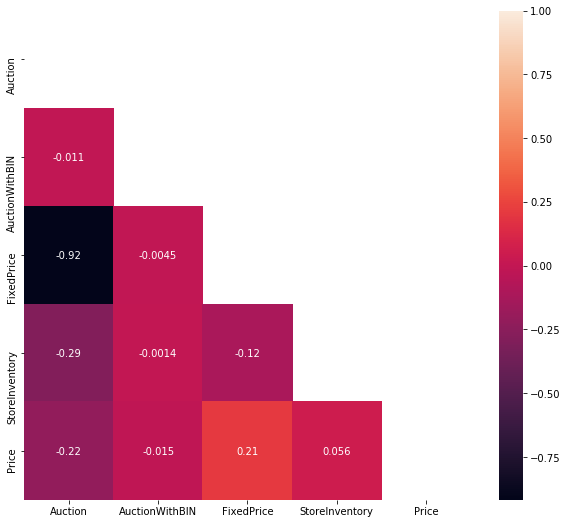

In [41]:
var = 'listingInfo.listingType'
plot_boxplot(df,var)
plot_corr(df,var)

We can see here that there is a weak correlation between "Listing type" and "Price" if the price is fixed the price of the item tends to be slightly higher. This makes sense as people would pay more to get an item straight away.

Trying to make the Price more normally distributed.

((array([-3.9534113 , -3.73594253, -3.61688868, ...,  3.61688868,
          3.73594253,  3.9534113 ]),
  array([ 10.,  10.,  10., ..., 300., 300., 300.])),
 (53.29751505694569, 125.16929250263995, 0.9944176833286843))

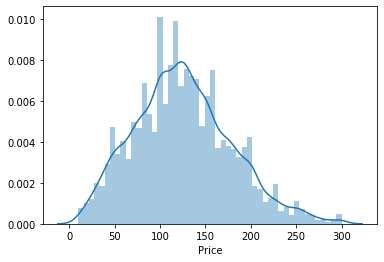

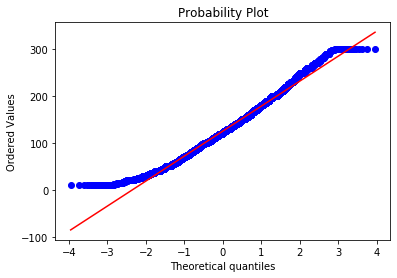

In [41]:
sns.distplot(df['Price'])
fig = plt.figure()
scipy.stats.probplot(df['Price'],plot=plt)

In [42]:
skew = df['Price'].skew()
kurt = df['Price'].kurt()
print(f'Skewness: : {skew}')
print(f'Kurtosis: : {kurt}')

Skewness: : 0.3746666727120548
Kurtosis: : -0.026836042246304537


Still could be better, so going to perform a sqrt transformation on the data.

((array([-3.9534113 , -3.73594253, -3.61688868, ...,  3.61688868,
          3.73594253,  3.9534113 ]),
  array([ 3.16227766,  3.16227766,  3.16227766, ..., 17.32050808,
         17.32050808, 17.32050808])),
 (2.4960479691188557, 10.90425980393639, 0.9969013480426345))

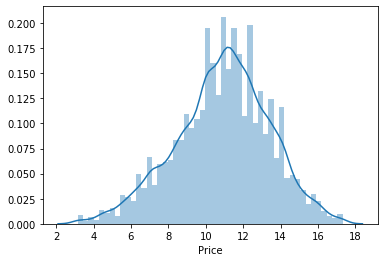

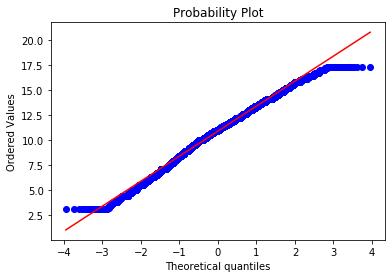

In [43]:
df['Price'] = np.sqrt(df['Price'])
sns.distplot(df['Price'])
fig = plt.figure()
scipy.stats.probplot(df['Price'],plot=plt)

In [44]:
skew = df['Price'].skew()
kurt = df['Price'].kurt()
print(f'Skewness: : {skew}')
print(f'Kurtosis: : {kurt}')

Skewness: : -0.27214439459244727
Kurtosis: : -0.0334759788529615


In [45]:
df['Price'].describe()

count    17993.000000
mean     10.904260   
std      2.503350    
min      3.162278    
25%      9.345052    
50%      11.045361   
75%      12.648715   
max      17.320508   
Name: Price, dtype: float64

In [98]:
df_final = df.copy()
done_cols  = df.corr()['Price'].sort_values(ascending=False).index
not_done_cols = [col for col in df if col not in done_cols]
for col in not_done_cols:
    df_final[col] = pd.factorize(df[col])[0]

In [99]:
df_final = df_final.drop(columns=['viewItemURL'])

In [100]:
df_final.head()

,globalId,primaryCategory.categoryName,paymentMethod,autoPay,sellerInfo.feedbackScore,sellerInfo.positiveFeedbackPercent,sellerInfo.feedbackRatingStar,sellerInfo.topRatedSeller,shippingInfo.shippingServiceCost.value,shippingInfo.shippingType,...,below in desc,new in desc,spares in desc,Day Started,Day Ended,Time Started,Time Ended,Start Price,City,Country
0,0,0,0,False,516,100.0,0,False,0.00,0,...,0,0,0,0,0,0,0,296.373739,0,0
1,0,0,0,False,1744,100.0,1,False,4.99,1,...,0,0,0,1,0,0,1,68.887521,1,0
2,0,0,0,False,156,100.0,2,False,9.50,1,...,0,0,0,0,1,1,0,90.358858,2,1
3,0,0,0,False,594,100.0,0,False,7.50,1,...,0,1,0,1,2,1,0,0.000000,3,0
4,0,0,0,False,3025,99.3,1,False,0.00,0,...,0,1,0,2,1,1,0,0.986582,4,0


In [110]:
for col in df_final.columns:
    if(df_final[col].nunique() > 4):
        print(col)

sellerInfo.feedbackRatingStar
shippingInfo.shippingServiceCost.value
shippingInfo.shippingType
sellingStatus.currentPrice._currencyId
Price
listingInfo.watchCount
condition.conditionId
condition.conditionDisplayName
Features
Storage Capacity
Colour
Day Started
Day Ended
Start Price


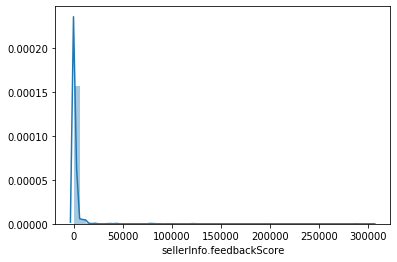

In [75]:
sns.distplot(df_final['sellerInfo.feedbackScore'],norm_hist=True)

In [91]:
df_final['City'].describe()

count    17993.000000
mean     245.431112  
std      251.949815  
min      0.000000    
25%      43.000000   
50%      159.000000  
75%      370.000000  
max      1123.000000 
Name: City, dtype: float64

In [106]:
df_final['Country'].value_counts()

0    17665
1    328  
Name: Country, dtype: int64

In [102]:
def fix_feedback_score(x):
    if(x <= 63):
        x = 0
        return x
    elif(x > 63 and x <= 229):
        x = 1
        return x
    elif(x > 229 and x <= 661):
        x = 2 
        return x
    else:
        x = 3
        return x
def fix_feedback_percentage(x):
    if(x >= 99.9):
        x = 1
        return x
    elif(x<99.9 and x >= 90):
        x = 2
        return x
    else:
        x = 0
        return x
def fix_country(x):
    if(x != 0):
        x = 1
        return x
    else:
        return x

In [103]:
df_final['sellerInfo.feedbackScore'] = df_final['sellerInfo.feedbackScore'].apply(fix_feedback_score)

In [104]:
df_final['sellerInfo.positiveFeedbackPercent'] = df_final['sellerInfo.positiveFeedbackPercent'].apply(fix_feedback_percentage)

In [105]:
df_final['Country'] = df_final['Country'].apply(fix_country)

In [113]:
df_final.corr()['Start Price']['listingInfo.listingType']

-0.6085429611445534

In [114]:
df_final.corr()['Price']['listingInfo.listingType']

0.15898194118561873

In [109]:
df_final = df_final.drop(columns='City')

In [116]:
import os
path = os.getcwd() + "\\finaldata.pkl"
df_final.to_pickle(path)